In [ ]:

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize


In [ ]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#test and train dataset split

df = pd.read_csv('/content/feature_tt.csv')
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [ ]:
x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)


In [ ]:
x.head()

,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
0,8.678004e+05,471980.0,6.900105,50.809972,2180252.207,2329379.638,1,2705772.220,126485.0,1.977388,...,2179469.000,2181226.244,1,289491.135600,4153.0,7.681071,58.999222,2.179686e+06,2.180438e+06,1
1,1.850794e+06,955759.0,3.881542,14.407807,3566533.667,3991240.860,1,3004172.983,167201.0,1.803309,...,3712198.806,3782084.274,1,577820.305100,3042.0,5.285282,26.848516,3.060695e+06,3.089167e+06,1
2,1.134943e+06,479148.0,5.016887,24.924251,2999883.170,3183530.068,1,2990260.712,163977.0,1.801485,...,5780206.467,6169502.272,1,291403.813600,5399.0,7.681019,58.998682,2.180037e+06,2.181038e+06,1
4,9.273475e+05,426105.0,6.595898,47.577368,2206970.446,2376581.045,1,3835929.017,133225.0,1.380041,...,3710380.216,3779434.127,1,293125.389800,6583.0,7.680887,58.997303,2.181089e+06,2.182302e+06,1
5,1.758434e+06,120584.0,2.995826,7.366192,4630338.841,4916171.184,1,2031280.831,25134.0,2.420100,...,5458637.762,5769003.856,1,6986.745763,5468.0,1.293009,1.840582,6.109589e+03,9.247110e+03,1


In [ ]:
#precision, f1, recall values
def eval_fun(labels, preds):
    labels = labels.split(' ')
    preds = preds.split(' ')
    rr = (np.intersect1d(labels, preds))
    precision = np.float(len(rr)) / len(preds)
    recall = np.float(len(rr)) / len(labels)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return (precision, recall, 0.0)
    return (precision, recall, f1)

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),

    xgb.XGBClassifier(),

    ]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('/content/feature_tt.csv')

# Split the dataset into training and testing sets
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.7
train = df[msk]
test = df[~msk]

# Separate features and target variable
x_train = train.drop("Level", axis=1)
y_train = train["Level"]
x_test = test.drop("Level", axis=1)
y_test = test["Level"]

# Convert class labels to start from 0
y_train = y_train - 1
y_test = y_test - 1

# Define the list of classifiers
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    XGBClassifier(),
]

# Initialize an empty DataFrame to store results
MLA_columns = []
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Loop through each classifier
for alg in MLA:
    # Train the classifier
    alg.fit(x_train, y_train)

    # Make predictions on the test set
    predicted = alg.predict(x_test)

    # Evaluate the classifier and store the results in MLA_compare DataFrame
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)

    row_index += 1

# Sort the results by test accuracy
MLA_compare.sort_values(by='MLA Test Accuracy', ascending=False, inplace=True)


# Save the trained XGBClassifier model to a file named 'model'
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_model.save_model(r'model_stats')
# Display the model comparison results
MLA_compare



,MLA Name,MLA Train Accuracy,MLA Test Accuracy
61,RandomForestClassifier,1.0000,0.7736
75,XGBClassifier,1.0000,0.7170
73,LinearSVC,0.7407,0.6792
72,NuSVC,0.7963,0.6792
71,SVC,0.7222,0.6792
70,KNeighborsClassifier,0.7500,0.6792
60,GradientBoostingClassifier,1.0000,0.6604
69,GaussianNB,0.7407,0.6415
57,AdaBoostClassifier,0.7130,0.6415
58,BaggingClassifier,1.0000,0.6226


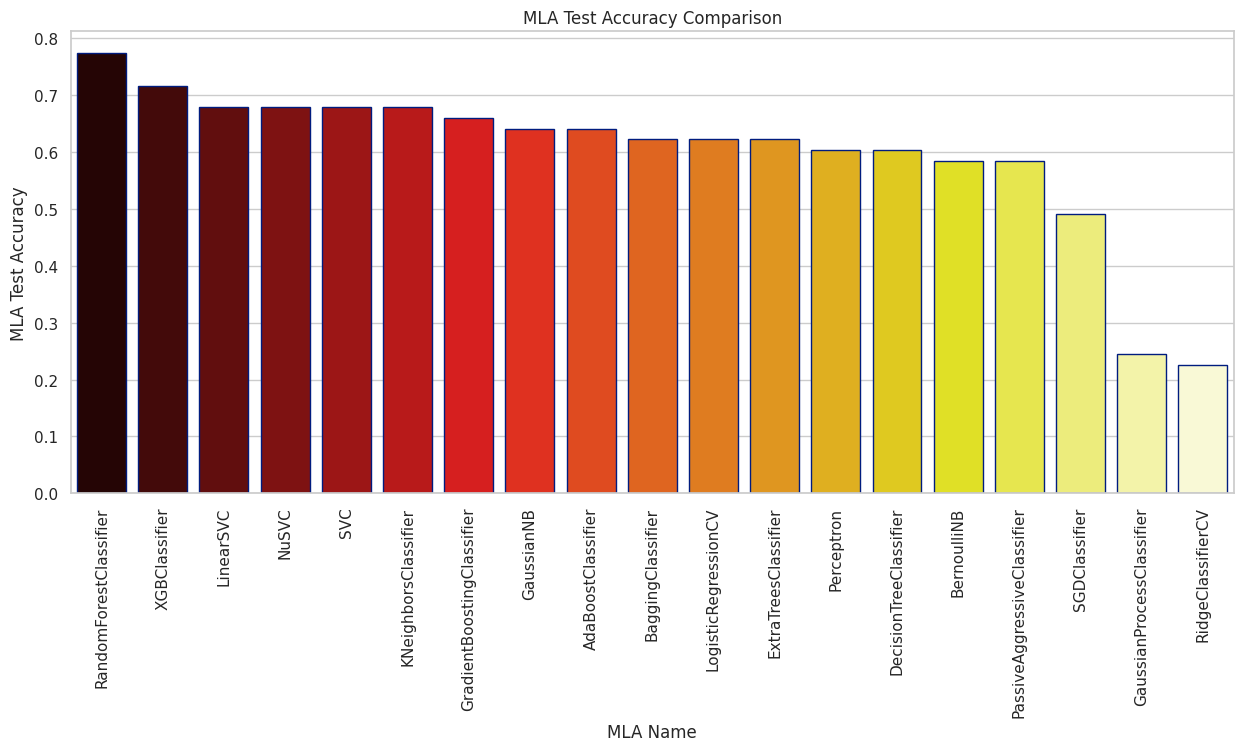

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

<Axes: xlabel='MLA Test Accuracy', ylabel='MLA Name'>

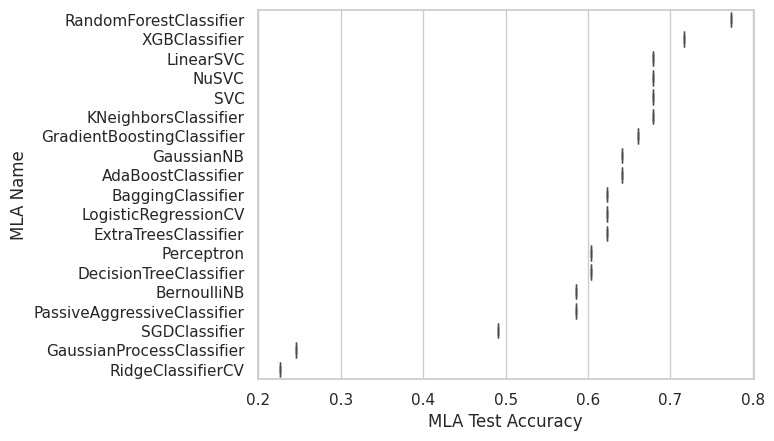

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(y="MLA Name", x="MLA Test Accuracy",data=MLA_compare)

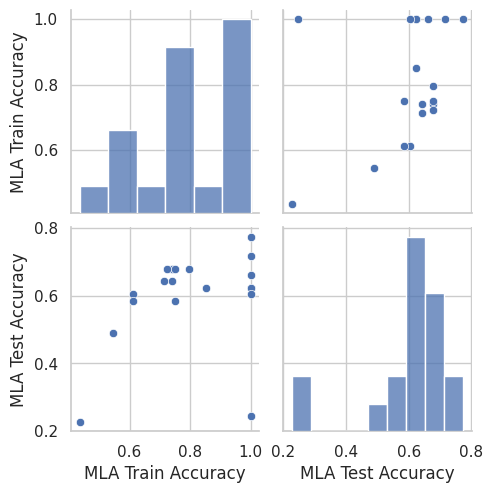

In [ ]:
sns.set(style="whitegrid")
sns.pairplot(data=MLA_compare)

In [ ]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.65      0.73      0.69        15\n           1       0.92      0.73      0.81        15\n           2       0.58      0.64      0.61        11\n           3       0.75      0.75      0.75        12\n\n    accuracy                           0.72        53\n   macro avg       0.72      0.71      0.72        53\nweighted avg       0.73      0.72      0.72        53\n'

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

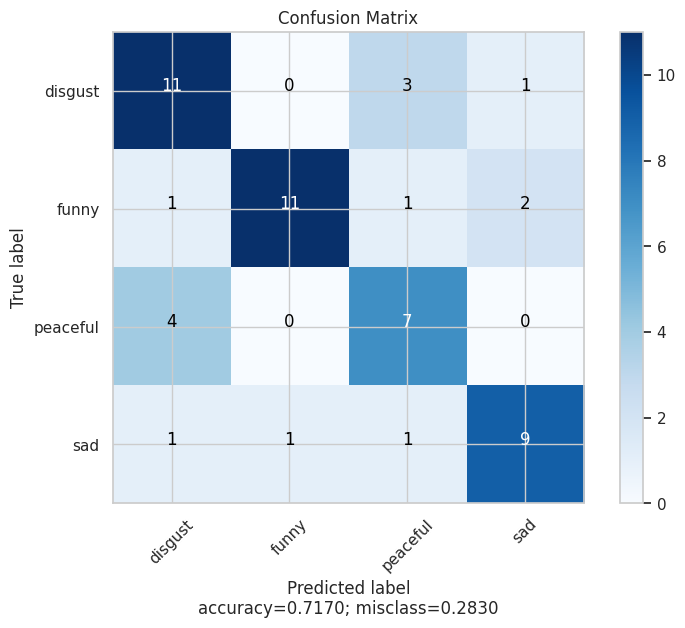

In [ ]:
#not normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = False,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

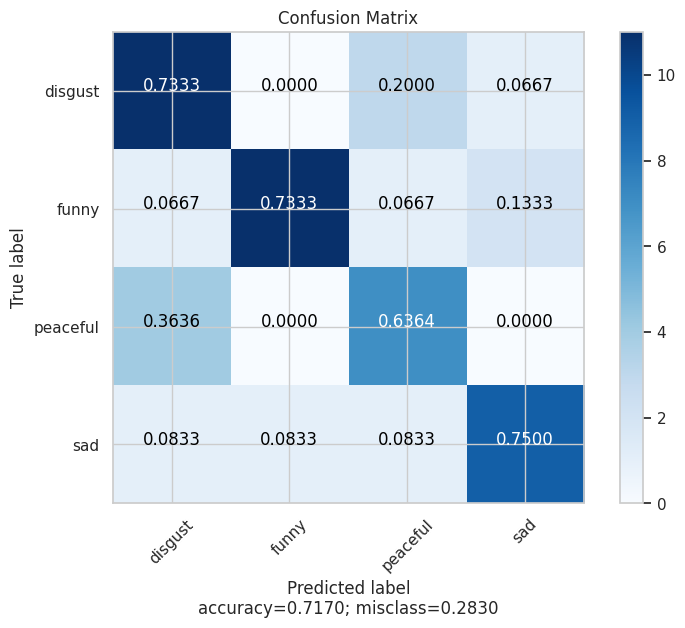

In [ ]:
#normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = True,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import metrics

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:


    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission(Macro)'] = precision_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Precission(Micro)'] = precision_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Precission(Weighted)'] = precision_score(y_test, predicted, average="weighted")
    MLA_compare.loc[row_index, 'MLA Recall(macro)'] = recall_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Recall(micro)'] = recall_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Recall(weighted)'] = recall_score(y_test, predicted, average="weighted")
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1 Score(Macro)'] = metrics.f1_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'F1 Score(Micro)'] = metrics.f1_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'F1 Score(Weighted)'] = metrics.f1_score(y_test, predicted, average="weighted")



    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission(Macro),MLA Precission(Micro),MLA Precission(Weighted),MLA Recall(macro),MLA Recall(micro),MLA Recall(weighted),F1 Score(Macro),F1 Score(Micro),F1 Score(Weighted)
18,XGBClassifier,1.0000,0.7170,0.724265,0.716981,0.733444,0.713258,0.716981,0.716981,0.715253,0.716981,0.721328
15,NuSVC,0.7963,0.6792,0.715336,0.679245,0.706041,0.677652,0.679245,0.679245,0.689430,0.679245,0.686453
14,SVC,0.7222,0.6792,0.721306,0.679245,0.706269,0.681818,0.679245,0.679245,0.694455,0.679245,0.686394
7,PassiveAggressiveClassifier,0.7130,0.6792,0.686345,0.679245,0.695180,0.696212,0.679245,0.679245,0.666050,0.679245,0.660642
13,KNeighborsClassifier,0.7500,0.6792,0.697917,0.679245,0.688679,0.663258,0.679245,0.679245,0.664945,0.679245,0.668856
2,ExtraTreesClassifier,1.0000,0.6604,0.662418,0.660377,0.658084,0.652652,0.660377,0.660377,0.653274,0.660377,0.655099
3,GradientBoostingClassifier,1.0000,0.6604,0.688605,0.660377,0.677494,0.654924,0.660377,0.660377,0.665319,0.660377,0.663126
4,RandomForestClassifier,1.0000,0.6604,0.656090,0.660377,0.657475,0.667045,0.660377,0.660377,0.659524,0.660377,0.657008
12,GaussianNB,0.7407,0.6415,0.670232,0.641509,0.668409,0.652652,0.641509,0.641509,0.652059,0.641509,0.645544
0,AdaBoostClassifier,0.7130,0.6415,0.694231,0.641509,0.676488,0.621591,0.641509,0.641509,0.615607,0.641509,0.618235


In [ ]:
importances = xgb_model.feature_importances_
print(importances)

[0.02788638 0.01431992 0.02185596 0.         0.02847284 0.00686511
 0.         0.01501813 0.01696299 0.07634742 0.         0.00307528
 0.0015814  0.         0.02158686 0.00565384 0.00141347 0.
 0.05680002 0.         0.         0.01327869 0.14693388 0.02213266
 0.         0.00462424 0.01963029 0.         0.01826524 0.03110999
 0.00429129 0.         0.00941688 0.         0.         0.00270244
 0.05938569 0.0023911  0.00054162 0.0063595  0.         0.
 0.04964715 0.02243099 0.00798501 0.11176489 0.0019301  0.
 0.         0.01161653 0.04069218 0.04216283 0.005706   0.04818666
 0.01160358 0.         0.00737089]


In [ ]:
import pandas as pd
import xgboost as xgb

# Load the trained XGBoost model from file
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('/content/model_stats')  # Replace 'path_to_model_file.model' with the actual path to your model file

# Load the new data on which you want to make predictions
# Initialize an empty list to store feature values
feature_values = []

# List of all feature names
feature_values =[
    1734582.199, 231833, 2.987423561, 7.528489127, 4625938.201, 4902207.919, 1, 4317825.947, 86214, 1.154788201,
    -0.679754321, 7323802.309, 8448903.522, 1, 1429031.835, 9002, 3.055762384, 7.614208364, 4699045.736, 4874512.688,
    1, 2850621.827, 13683, 1.802367249, 1.305174701, 6330041.229, 6893221.867, 1, 2282071, 14163, 2.180044189,
    2.857561256, 5776721.415, 6165429.678, 1, 3990916.447, 23083, 1.263248936, -0.410320987, 7174259.851,
    8157563.972, 1, 2566852.783, 16197, 1.979287593, 1.993682013, 6065420.891, 6539154.179, 1, 292276.7738,
    7476, 7.677320877, 58.99578125, 2176769.548, 2177969.354, 1, 1
]



# Make predictions using the trained XGBoost model with the adjusted feature set
predictions = xgb_model.predict([feature_values])

# Display the prediction
print("Predicted Level:", predictions)



Predicted Level: [3]


In [ ]:
music_df = pd.read_csv('/content/data_moods.csv')

In [ ]:
music_df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,27-10-1982,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,1
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,16-04-2007,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,3
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,06-11-2006,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,3
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,21-08-1984,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,1
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,01-01-2004,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,19-06-2020,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,2
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,19-11-2019,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,3
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,17-04-2020,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,3
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,03-05-2019,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,3


In [ ]:
music_df = music_df[['name','acousticness', 'danceability', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'release_date','mood']]
music_df.head()

,name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,release_date,mood
0,1999,0.13700,0.866,0.730,0.000000,5,0.0843,-8.201,68,0.0767,118.523,0.625,27-10-1982,1
1,23,0.01890,0.381,0.832,0.196000,8,0.1530,-5.069,43,0.0492,120.255,0.166,16-04-2007,3
2,9 Crimes,0.91300,0.346,0.139,0.000077,0,0.0934,-15.326,60,0.0321,136.168,0.116,06-11-2006,3
3,99 Luftballons,0.08900,0.466,0.438,0.000006,4,0.1130,-12.858,2,0.0608,193.100,0.587,21-08-1984,1
4,A Boy Brushed Red Living In Black And White,0.00171,0.419,0.932,0.000000,1,0.1370,-3.604,60,0.1060,169.881,0.445,01-01-2004,0


In [ ]:
music_df["mood"].value_counts()

mood
3    197
2    195
0    154
1    140
Name: count, dtype: int64

In [ ]:
print(music_df['mood'].unique())

[1 3 0 2]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=4,
                                   verbose=2))],verbose=True)
X = music_df.select_dtypes(np.number)
number_cols = list(X.columns)
print(number_cols)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
music_df['cluster_label'] = song_cluster_labels

['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'mood']
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 7243.686870000231.
Iteration 1, inertia 4896.7271317301365.
Iteration 2, inertia 4690.791853038219.
Iteration 3, inertia 4633.667685870019.
Iteration 4, inertia 4625.151899630001.
Iteration 5, inertia 4623.9478892361485.
Iteration 6, inertia 4622.563248432965.
Iteration 7, inertia 4620.156036445007.
Iteration 8, inertia 4619.961241354726.
Iteration 9, inertia 4619.889777183989.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 10161.613450362023.
Iteration 1, inertia 5111.28235558178.
Iteration 2, inertia 4935.4625072404415.
Iteration 3, inertia 4836.535931133146.
Iteration 4, inertia 4742.407712591603.
Iteration 5, inertia 4661.011219696366.
Iteration 6, inertia 4630.893954850095.
I

In [ ]:
import joblib
# Save the model as a pickle in a file
joblib.dump(song_cluster_pipeline, 'kmeans.pkl')

['kmeans.pkl']

In [ ]:
from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = music_df['name']
projection['cluster'] = music_df['cluster_label']

In [ ]:
import plotly.express as px
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:
# Assuming mood labels are stored as numeric values in the 'mood' column
predicted_numeric_mood = 0  # Replace with your actual numeric mood value

Play = music_df[music_df['mood'] == predicted_numeric_mood]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)

# Display the result
display(Play)


,name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,release_date,mood,cluster_label
0,Chop Suey!,0.000278,0.419,0.934,0.001500,7,0.1320,-3.908,79,0.1200,127.288,0.286,04-09-2001,0,3
1,Killing In The Name,0.026600,0.466,0.833,0.000000,7,0.0327,-4.215,78,0.3040,88.785,0.661,1992,0,3
2,Dani California,0.019300,0.556,0.913,0.000009,0,0.3460,-2.360,77,0.0437,96.184,0.730,09-05-2006,0,0
3,Duality,0.000237,0.354,0.982,0.000294,4,0.2040,-3.026,76,0.1680,143.772,0.194,2004,0,3
4,Uprising,0.000202,0.602,0.905,0.064000,2,0.1170,-4.046,75,0.0775,128.019,0.411,10-09-2009,0,0


In [ ]:
# Display the prediction
print("Predicted Level:", predictions)

Predicted Level: [3]


In [ ]:
predicted_numeric_mood = predictions[0]
print("Predicted Numeric Mood:", predicted_numeric_mood)

Play = music_df[music_df['mood'] == predicted_numeric_mood]
print("Number of songs matching the predicted mood:", len(Play))

Play = music_df[music_df['mood'] == predicted_numeric_mood]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)

# Display the result
display(Play)

Predicted Numeric Mood: 3
Number of songs matching the predicted mood: 197


,name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,release_date,mood,cluster_label
0,lovely (with Khalid),0.934,0.351,0.296,0.000000,4,0.0950,-10.109,88,0.0333,115.284,0.1200,19-04-2018,3,2
1,you broke me first,0.786,0.642,0.374,0.000000,4,0.0906,-9.386,87,0.0545,124.099,0.0799,17-04-2020,3,2
2,when the party's over,0.978,0.367,0.111,0.000040,4,0.0897,-14.084,87,0.0972,82.642,0.1980,29-03-2019,3,2
3,Falling,0.839,0.567,0.267,0.000001,4,0.0890,-6.502,87,0.0299,110.011,0.0592,13-12-2019,3,2
4,Before You Go,0.604,0.459,0.575,0.000000,3,0.0885,-4.858,85,0.0573,111.881,0.1830,22-11-2019,3,2


In [ ]:

# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(predicted_numeric_mood):

    if(predicted_numeric_mood == 3):

        Play = music_df[music_df['mood'] == 3 ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 2):

        Play = music_df[music_df['mood'] == 2]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 0):

        Play = music_df[music_df['mood'] == 0]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 1):

        Play = music_df[music_df['mood'] == 1 ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

In [ ]:
Recommend_Songs(predicted_numeric_mood)
print(Recommend_Songs)

,name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,release_date,mood,cluster_label
0,lovely (with Khalid),0.934,0.351,0.296,0.000000,4,0.0950,-10.109,88,0.0333,115.284,0.1200,19-04-2018,3,2
1,you broke me first,0.786,0.642,0.374,0.000000,4,0.0906,-9.386,87,0.0545,124.099,0.0799,17-04-2020,3,2
2,when the party's over,0.978,0.367,0.111,0.000040,4,0.0897,-14.084,87,0.0972,82.642,0.1980,29-03-2019,3,2
3,Falling,0.839,0.567,0.267,0.000001,4,0.0890,-6.502,87,0.0299,110.011,0.0592,13-12-2019,3,2
4,Before You Go,0.604,0.459,0.575,0.000000,3,0.0885,-4.858,85,0.0573,111.881,0.1830,22-11-2019,3,2


<function Recommend_Songs at 0x7b73b0adadd0>
